# **Algoritmo di steepest descent**

## *Configurazione che minimizza l'energia*

In [1]:
import numpy as np
from CMS.MolecularDynamics.CrystalStructure import CrystalStructure as Crystal
from CMS.MolecularDynamics.SteepestDescent import SteepestDescent

In [2]:
# Nome del file (numero di atomi da studiare: N_atoms)
def build_filename(N_atoms):
    return f'../../../data/pos-fcc100-random/fcc100a{N_atoms}.txt'

list_N_atoms = [108, 256, 500, 864, 1372, 2048]

#### Dati globali

In [3]:
# interrompe l'algoritmo se non converge entro max_steps
max_steps = 50000

# coefficiente di discesa # poi 0.003, 0.01
C_steep = 0.0005

# forza limite per la convergenza
F_tol = 0.0005

In [4]:
list_E_pot = []
list_max_forces = []

In [5]:
for N_atoms in list_N_atoms:
    filename = build_filename(N_atoms)
    print(f"=== Minimizzazione per {N_atoms} atomi nel file {filename} ===")
    # Inizializza la struttura cristallina
    cristallo = Crystal.from_file(filename)
    cristallo.set_R_C(4.5)
    cristallo.set_R_P(4.2)
    cristallo.set_R_V(5.0)
    
    steepest = SteepestDescent(cristallo)
    potential_energies, max_forces = steepest.minimize_energy(C_steep=C_steep,
                                                              F_tol=F_tol,
                                                              max_steps=max_steps,
                                                              pol_junction=True)
    list_E_pot.append(potential_energies)
    list_max_forces.append(max_forces)
    
    # salvo posizioni finali in un file
    #np.savetxt(f'../../../data/pos-fcc100-minime/fcc100a{N_atoms}_1.txt', cristallo.positions)

=== Minimizzazione per 108 atomi nel file ../../../data/pos-fcc100-random/fcc100a108.txt ===
Converged in 4511 steps.
=== Minimizzazione per 256 atomi nel file ../../../data/pos-fcc100-random/fcc100a256.txt ===
Converged in 6996 steps.
=== Minimizzazione per 500 atomi nel file ../../../data/pos-fcc100-random/fcc100a500.txt ===
Converged in 9851 steps.
=== Minimizzazione per 864 atomi nel file ../../../data/pos-fcc100-random/fcc100a864.txt ===
Converged in 13017 steps.
=== Minimizzazione per 1372 atomi nel file ../../../data/pos-fcc100-random/fcc100a1372.txt ===
Converged in 16417 steps.
=== Minimizzazione per 2048 atomi nel file ../../../data/pos-fcc100-random/fcc100a2048.txt ===
Converged in 19991 steps.


### Plot

In [6]:
# salvo i dati di energia e forza per ogni N_atoms in file separati
for i, N_atoms in enumerate(list_N_atoms):
    np.savetxt(f'../../../data/pos-fcc100-minime/fcc100a{N_atoms}_Epot.csv', list_E_pot[i], delimiter=',')
    np.savetxt(f'../../../data/pos-fcc100-minime/fcc100a{N_atoms}_Fmax.csv', list_max_forces[i], delimiter=',')

In [7]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

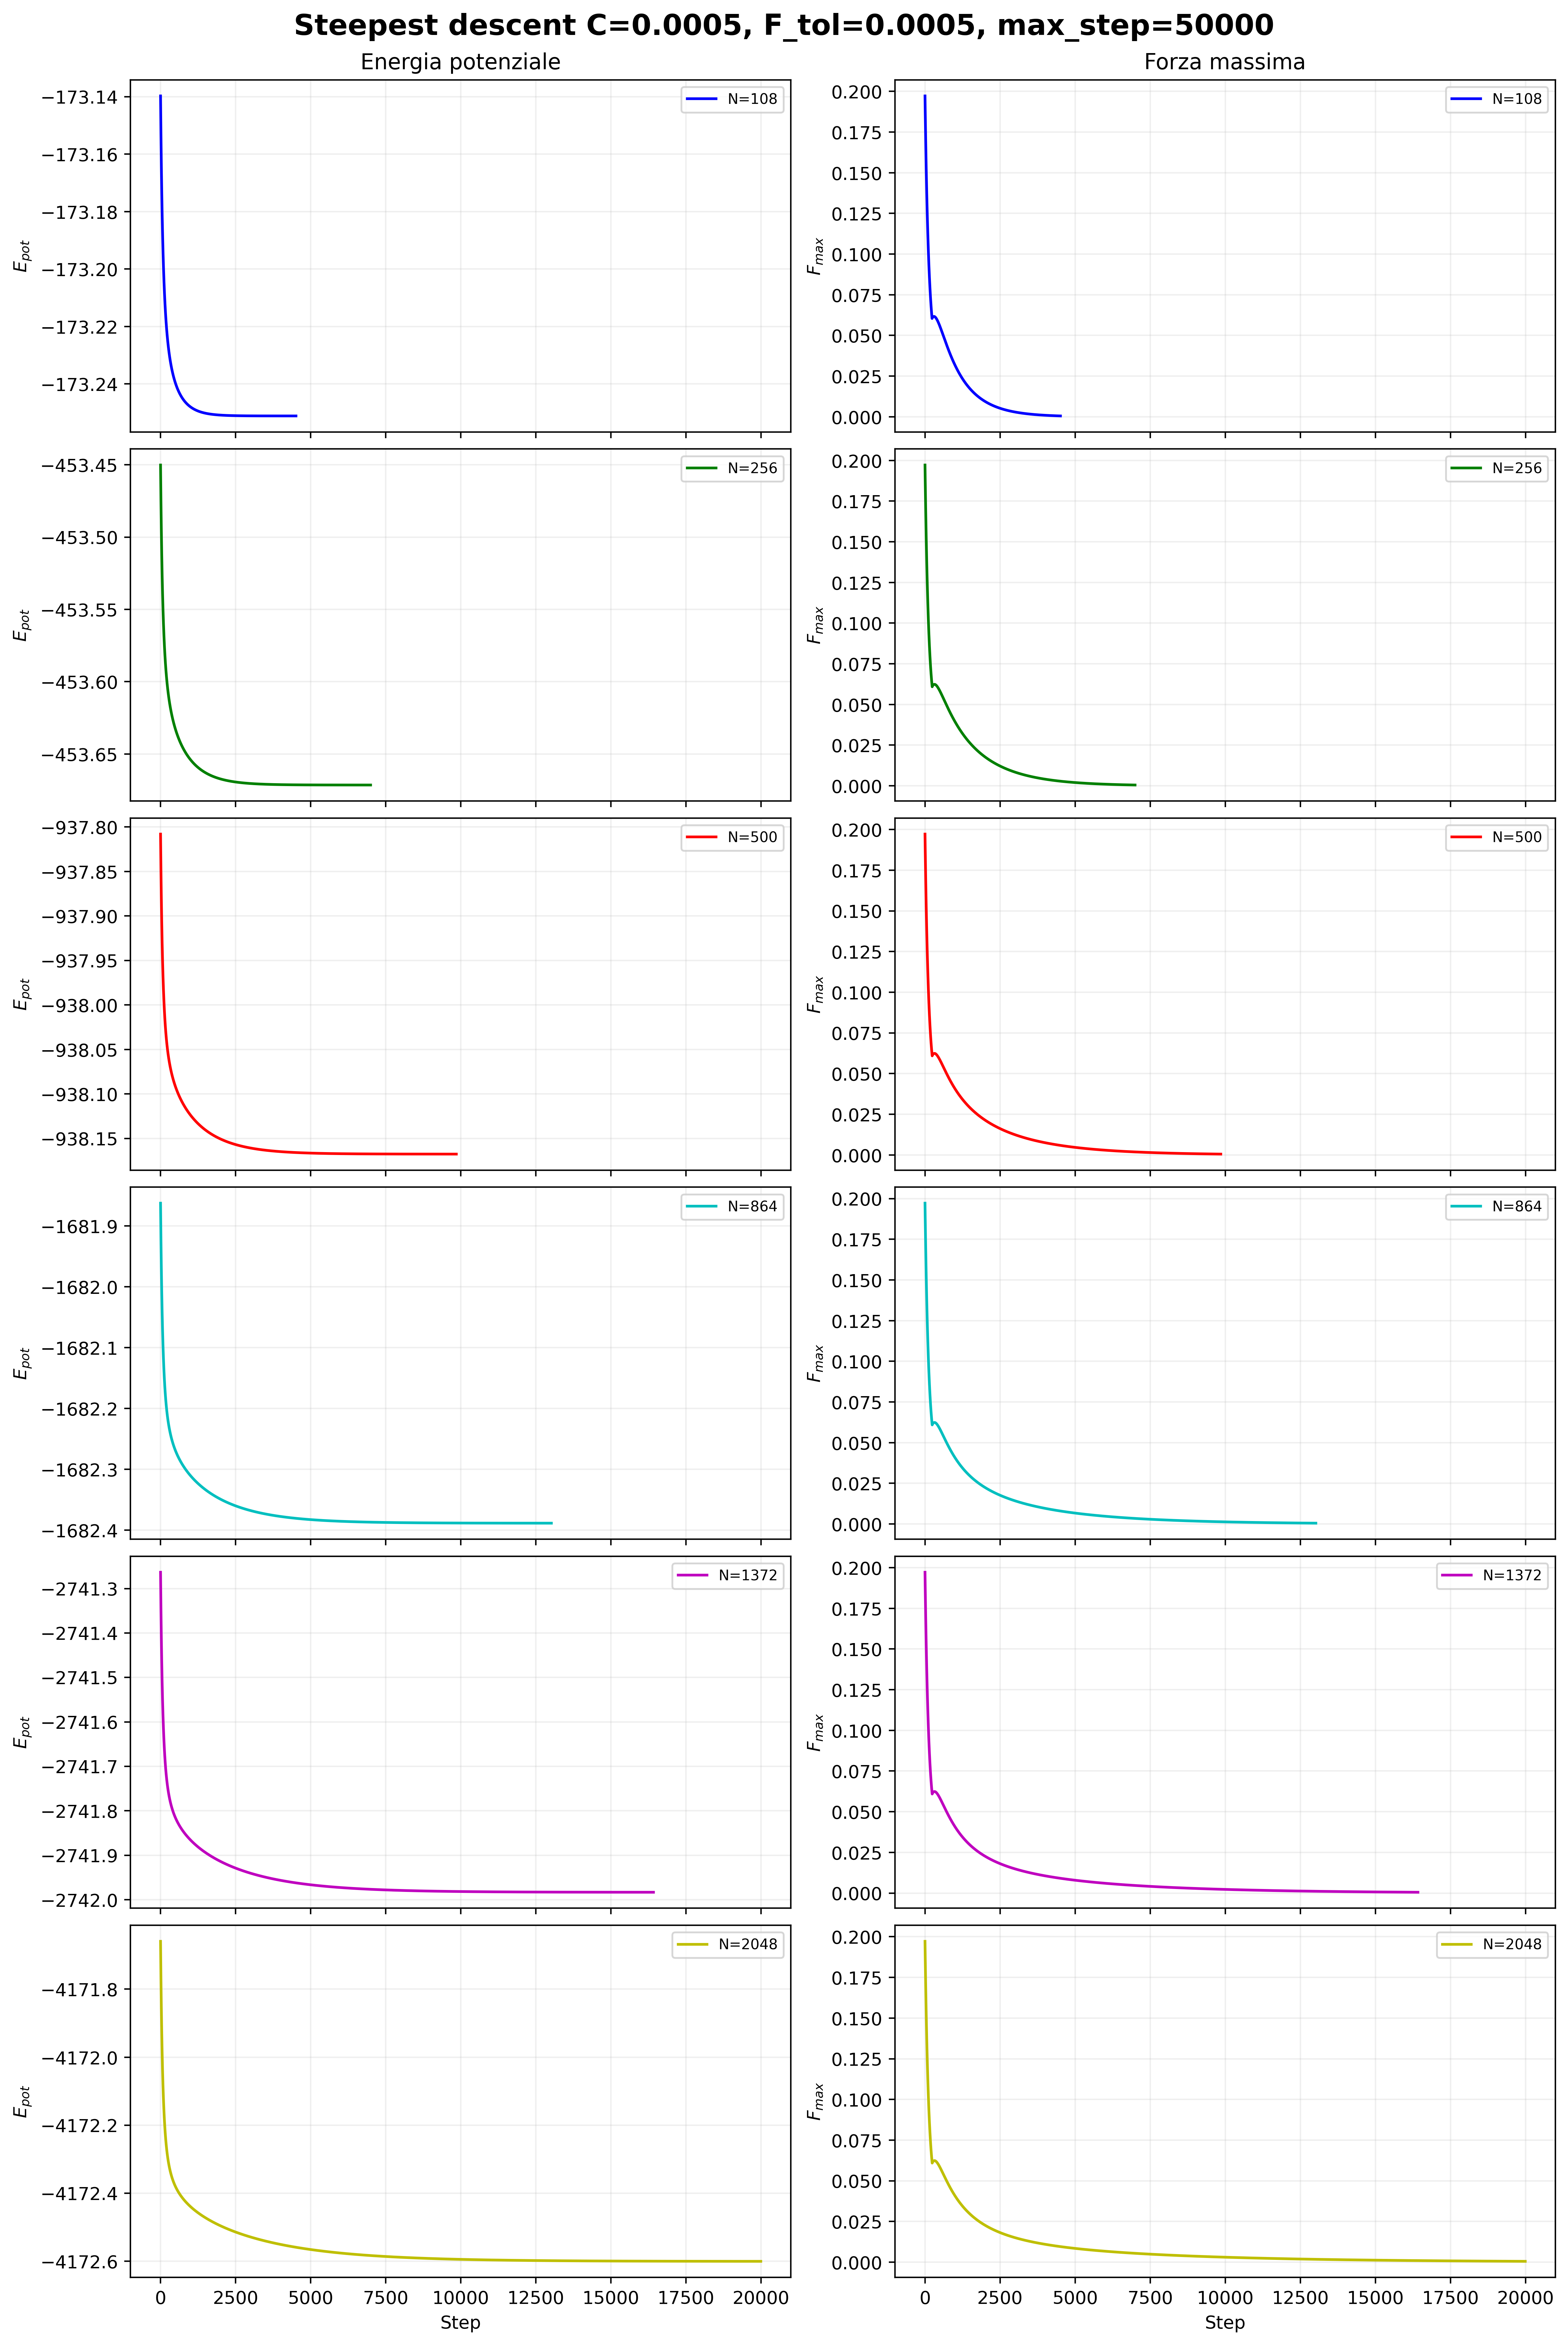

In [8]:
import matplotlib.pyplot as plt
nrows, ncols = 6, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 18), sharex='col', constrained_layout=True, dpi=400)

for i, (N_atoms, E_pot, F_max) in enumerate(zip(list_N_atoms, list_E_pot, list_max_forces)):
    if i >= nrows:
        break  
    color = colors[i % len(colors)]
    # colonna 0: energia; colonna 1: forza
    axes[i, 0].plot(E_pot, color=color, label=f'N={N_atoms}')
    axes[i, 1].plot(F_max, color=color, label=f'N={N_atoms}')
    # etichette di riga
    axes[i, 0].set_ylabel(r'$E_{pot}$')
    axes[i, 1].set_ylabel(r'$F_{max}$')
    axes[i, 0].legend(loc='best', fontsize=8)
    axes[i, 1].legend(loc='best', fontsize=8)
    axes[i, 0].grid(True, alpha=0.2)
    axes[i, 1].grid(True, alpha=0.2)

# titoli per colonne
axes[0, 0].set_title('Energia potenziale')
axes[0, 1].set_title('Forza massima')
# asse x per l’ultima riga
axes[-1, 0].set_xlabel('Step')
axes[-1, 1].set_xlabel('Step')

# nascondi righe non usate se meno di 6 dataset
rows_used = min(len(list_N_atoms), nrows)
for r in range(rows_used, nrows):
    for c in range(ncols):
        axes[r, c].axis('off')

fig.suptitle(f'Steepest descent C={C_steep}, F_tol={F_tol}, max_step={max_steps}', fontsize=16, fontweight='bold')
plt.show()

## Plot solo 256 atomi

## Prove con diversi parametri

### C_s=1e-3~F_t=1e-3~max_s=10k (2m 24s)

In [9]:
'''
OUTPUT OTTENUTO:
=== Minimizzazione per 108 atomi nel file ../../../data/pos-fcc100-random/fcc100a108.txt ===
Converged in 1956 steps.
=== Minimizzazione per 256 atomi nel file ../../../data/pos-fcc100-random/fcc100a256.txt ===
Converged in 2999 steps.
=== Minimizzazione per 500 atomi nel file ../../../data/pos-fcc100-random/fcc100a500.txt ===
Converged in 4159 steps.
=== Minimizzazione per 864 atomi nel file ../../../data/pos-fcc100-random/fcc100a864.txt ===
Converged in 5409 steps.
=== Minimizzazione per 1372 atomi nel file ../../../data/pos-fcc100-random/fcc100a1372.txt ===
Converged in 6716 steps.
=== Minimizzazione per 2048 atomi nel file ../../../data/pos-fcc100-random/fcc100a2048.txt ===
Converged in 8048 steps.
'''

'\nOUTPUT OTTENUTO:\n=== Minimizzazione per 108 atomi nel file ../../../data/pos-fcc100-random/fcc100a108.txt ===\nConverged in 1956 steps.\n=== Minimizzazione per 256 atomi nel file ../../../data/pos-fcc100-random/fcc100a256.txt ===\nConverged in 2999 steps.\n=== Minimizzazione per 500 atomi nel file ../../../data/pos-fcc100-random/fcc100a500.txt ===\nConverged in 4159 steps.\n=== Minimizzazione per 864 atomi nel file ../../../data/pos-fcc100-random/fcc100a864.txt ===\nConverged in 5409 steps.\n=== Minimizzazione per 1372 atomi nel file ../../../data/pos-fcc100-random/fcc100a1372.txt ===\nConverged in 6716 steps.\n=== Minimizzazione per 2048 atomi nel file ../../../data/pos-fcc100-random/fcc100a2048.txt ===\nConverged in 8048 steps.\n'

### C_s=5e-4~F_t=5e-4~max_s=50k (6m 5s)

In [10]:
'''
=== Minimizzazione per 108 atomi nel file ../../../data/pos-fcc100-random/fcc100a108.txt ===
Converged in 4511 steps.
=== Minimizzazione per 256 atomi nel file ../../../data/pos-fcc100-random/fcc100a256.txt ===
Converged in 6996 steps.
=== Minimizzazione per 500 atomi nel file ../../../data/pos-fcc100-random/fcc100a500.txt ===
Converged in 9851 steps.
=== Minimizzazione per 864 atomi nel file ../../../data/pos-fcc100-random/fcc100a864.txt ===
Converged in 13017 steps.
=== Minimizzazione per 1372 atomi nel file ../../../data/pos-fcc100-random/fcc100a1372.txt ===
Converged in 16417 steps.
=== Minimizzazione per 2048 atomi nel file ../../../data/pos-fcc100-random/fcc100a2048.txt ===
Converged in 19991 steps.
'''

'\n=== Minimizzazione per 108 atomi nel file ../../../data/pos-fcc100-random/fcc100a108.txt ===\nConverged in 4511 steps.\n=== Minimizzazione per 256 atomi nel file ../../../data/pos-fcc100-random/fcc100a256.txt ===\nConverged in 6996 steps.\n=== Minimizzazione per 500 atomi nel file ../../../data/pos-fcc100-random/fcc100a500.txt ===\nConverged in 9851 steps.\n=== Minimizzazione per 864 atomi nel file ../../../data/pos-fcc100-random/fcc100a864.txt ===\nConverged in 13017 steps.\n=== Minimizzazione per 1372 atomi nel file ../../../data/pos-fcc100-random/fcc100a1372.txt ===\nConverged in 16417 steps.\n=== Minimizzazione per 2048 atomi nel file ../../../data/pos-fcc100-random/fcc100a2048.txt ===\nConverged in 19991 steps.\n'

### C_s=3e-3~F_t=1e-3~max_s=50k (15s)

In [11]:
'''
=== Minimizzazione per 108 atomi nel file ../../../data/pos-fcc100-random/fcc100a108.txt ===
Converged in 651 steps.
=== Minimizzazione per 256 atomi nel file ../../../data/pos-fcc100-random/fcc100a256.txt ===
Converged in 998 steps.
=== Minimizzazione per 500 atomi nel file ../../../data/pos-fcc100-random/fcc100a500.txt ===
Converged in 1385 steps.
=== Minimizzazione per 864 atomi nel file ../../../data/pos-fcc100-random/fcc100a864.txt ===
Converged in 1802 steps.
=== Minimizzazione per 1372 atomi nel file ../../../data/pos-fcc100-random/fcc100a1372.txt ===
Converged in 2238 steps.
=== Minimizzazione per 2048 atomi nel file ../../../data/pos-fcc100-random/fcc100a2048.txt ===
Converged in 2682 steps.
'''

'\n=== Minimizzazione per 108 atomi nel file ../../../data/pos-fcc100-random/fcc100a108.txt ===\nConverged in 651 steps.\n=== Minimizzazione per 256 atomi nel file ../../../data/pos-fcc100-random/fcc100a256.txt ===\nConverged in 998 steps.\n=== Minimizzazione per 500 atomi nel file ../../../data/pos-fcc100-random/fcc100a500.txt ===\nConverged in 1385 steps.\n=== Minimizzazione per 864 atomi nel file ../../../data/pos-fcc100-random/fcc100a864.txt ===\nConverged in 1802 steps.\n=== Minimizzazione per 1372 atomi nel file ../../../data/pos-fcc100-random/fcc100a1372.txt ===\nConverged in 2238 steps.\n=== Minimizzazione per 2048 atomi nel file ../../../data/pos-fcc100-random/fcc100a2048.txt ===\nConverged in 2682 steps.\n'